In [1]:
#library(IRdisplay)
library(tidyverse)
library(stringr)

── Attaching core tidyverse packages ───────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read.csv("../input/laptop_price_explored.csv")

In [3]:
head(df)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00


### Data Preparation

#### Feature: Company

In [4]:
company_counts <- table(df$Company)
company_counts


     Acer     Apple      Asus     Chuwi      Dell   Fujitsu    Google        HP 
      103        21       158         3       297         3         3       274 
   Huawei    Lenovo        LG  Mediacom Microsoft       MSI     Razer   Samsung 
        2       297         3         7         6        54         7         9 
  Toshiba      Vero    Xiaomi 
       48         4         4 

In [5]:
companies_to_replace <- names(company_counts[company_counts < 20])

df$Company[df$Company %in% companies_to_replace] <- "Other"

table(df$Company)


   Acer   Apple    Asus    Dell      HP  Lenovo     MSI   Other Toshiba 
    103      21     158     297     274     297      54      51      48 

#### Feature: Product

In [6]:
df$Model <- sapply(strsplit(as.character(df$Product), " "), "[", 1)


num_unique_models <- length(unique(df$Model))

print(num_unique_models)

[1] 225


In [7]:
head(dplyr::count(df, Model, sort=TRUE), 10)

,Model,n
,<chr>,<int>
1,Inspiron,141
2,IdeaPad,95
3,Aspire,63
4,ThinkPad,62
5,Latitude,52
6,ProBook,50
7,EliteBook,45
8,XPS,39
9,Thinkpad,37


#### Feature: Inches

In [8]:
unique(df$Inches)

[1] 13.3 15.6 15.4 14.0 12.0 11.6 17.3 10.1 13.5 12.5 13.0 18.4 13.9 12.3 17.0
[16] 15.0 14.1 11.3

In [9]:
# Define the bin edges
bin_edges <- c(0, 11.8, 12.6, 13.7, 14.2, 16.8, Inf)

# Create custom labels
custom_labels <- c(0, 1, 2, 3, 4, 5)

# Create a new categorical variable based on binning
df$Inches_Binned <- cut(df$Inches, breaks = bin_edges, labels = custom_labels)

In [10]:
dplyr::count(df, Inches_Binned, sort=TRUE)

Inches_Binned,n
<fct>,<int>
4,673
3,204
2,172
5,166
1,50
0,38


#### Feature: Screen Resolution

In [11]:
# Extract the resolution from the "ScreenResolution" column
df$Resolution <- str_extract(df$ScreenResolution, "\\d+x\\d+")

# Create a new column for the display type
df$DisplayType <- str_trim(str_replace(df$ScreenResolution, "\\d+x\\d+", ""))

# Replace empty strings with NA
df$DisplayType[df$DisplayType == ""] <- NA

# Drop the original "ScreenResolution" column
df <- subset(df, select = -c(ScreenResolution))

In [12]:
# Create touchscreen variable
df$Touchscreen <- ifelse(grepl("Touchscreen", df$DisplayType, ignore.case = TRUE), "1", "0")

# Create IPS variable
df$IPS_Panel <- ifelse(grepl("IPS Panel", df$DisplayType, ignore.case = TRUE), "1", "0")

# Create Retina Display variable
df$RetinaDisplay <- ifelse(grepl("Retina Display", df$DisplayType, ignore.case = TRUE), "1", "0")

# Remove "Touchscreen" and "/" from "DisplayType"
df$DisplayType <- gsub("Touchscreen", "", df$DisplayType, ignore.case = TRUE)
df$DisplayType <- gsub("/ ", "", df$DisplayType)
df$DisplayType <- gsub("IPS Panel", "", df$DisplayType, ignore.case = TRUE)
df$DisplayType <- trimws(df$DisplayType)

# Replace '' with NA for visualization
df$DisplayType[df$DisplayType == ""] <- NA
df$Touchscreen[df$Touchscreen == ""] <- NA
df$IPS_Panel[df$IPS_Panel == ""] <- NA
df$RetinaDisplay[df$RetinaDisplay == ""] <- NA



In [13]:
unique(df$Resolution)

[1] "2560x1600" "1440x900"  "1920x1080" "2880x1800" "1366x768"  "2304x1440"
 [7] "3200x1800" "1920x1200" "2256x1504" "3840x2160" "2160x1440" "2560x1440"
[13] "1600x900"  "2736x1824" "2400x1600"

In [14]:
# Split the "Resolution" column into "ResolutionWidth" and "ResolutionHeight" columns
df <- df %>%
  separate(Resolution, into = c("ResolutionWidth", "ResolutionHeight"), sep = "x", convert = TRUE)
head(df)

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Model,Inches_Binned,ResolutionWidth,ResolutionHeight,DisplayType,Touchscreen,IPS_Panel,RetinaDisplay
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<fct>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,MacBook,2,2560,1600,Retina Display,0,1,1
2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Macbook,2,1440,900,NA,0,0,0
3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,250,4,1920,1080,Full HD,0,0,0
4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,MacBook,4,2880,1800,Retina Display,0,1,1
5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,MacBook,2,2560,1600,Retina Display,0,1,1
6,Acer,Aspire 3,Notebook,15.6,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00,Aspire,4,1366,768,NA,0,0,0


#### Feature: Cpu

In [15]:
head(dplyr::count(df, Cpu, sort=TRUE), 10)

,Cpu,n
,<chr>,<int>
1,Intel Core i5 7200U 2.5GHz,190
2,Intel Core i7 7700HQ 2.8GHz,146
3,Intel Core i7 7500U 2.7GHz,134
4,Intel Core i7 8550U 1.8GHz,73
5,Intel Core i5 8250U 1.6GHz,72
6,Intel Core i5 6200U 2.3GHz,68
7,Intel Core i3 6006U 2GHz,64
8,Intel Core i7 6500U 2.5GHz,49
9,Intel Core i7 6700HQ 2.6GHz,43


In [16]:
df <- df %>%
  mutate(CpuBrand = str_extract(Cpu, "^[a-zA-Z0-9]+"))

# Extract CpuProduct
df <- df %>%
  mutate(CpuProduct = str_extract(Cpu, "(?<=Core )[a-zA-Z0-9]+(?= [0-9])"))

# Extract CpuClockSpeed_GHz
df <- df %>%
  mutate(CpuClockSpeed_GHz = str_extract(Cpu, "[0-9.]+") %>% as.numeric())

# Display the updated dataframe
head(df)

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,⋯,Inches_Binned,ResolutionWidth,ResolutionHeight,DisplayType,Touchscreen,IPS_Panel,RetinaDisplay,CpuBrand,CpuProduct,CpuClockSpeed_GHz
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<fct>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,⋯,2,2560,1600,Retina Display,0,1,1,Intel,i5,5
2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,⋯,2,1440,900,NA,0,0,0,Intel,i5,5
3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,⋯,4,1920,1080,Full HD,0,0,0,Intel,i5,5
4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,⋯,4,2880,1800,Retina Display,0,1,1,Intel,i7,7
5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,⋯,2,2560,1600,Retina Display,0,1,1,Intel,i5,5
6,Acer,Aspire 3,Notebook,15.6,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,⋯,4,1366,768,NA,0,0,0,AMD,NA,9


#### Feature: Ram

In [17]:
# Remove "GB" from the end of Ram and convert to integer
df <- df %>%
  mutate(Ram_GB = as.integer(str_extract(Ram, "\\d+")))

print(unique(df$Ram_GB))

[1]  8 16  4  2 12  6 32 24 64


#### Feature: Memory

In [18]:
df <- df %>%
  separate(Memory, into = c("PrimaryMemory", "SecondaryMemory"), sep = "\\s\\+\\s", fill = "right")

# Replace NA values in SecondaryMemory with "0"
df <- df %>%
  mutate(SecondaryMemory = coalesce(SecondaryMemory, "0"))

head(df)

,Company,Product,TypeName,Inches,Cpu,Ram,PrimaryMemory,SecondaryMemory,Gpu,OpSys,⋯,ResolutionWidth,ResolutionHeight,DisplayType,Touchscreen,IPS_Panel,RetinaDisplay,CpuBrand,CpuProduct,CpuClockSpeed_GHz,Ram_GB
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,0,Intel Iris Plus Graphics 640,macOS,⋯,2560,1600,Retina Display,0,1,1,Intel,i5,5,8
2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,0,Intel HD Graphics 6000,macOS,⋯,1440,900,NA,0,0,0,Intel,i5,5,8
3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,0,Intel HD Graphics 620,No OS,⋯,1920,1080,Full HD,0,0,0,Intel,i5,5,8
4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,0,AMD Radeon Pro 455,macOS,⋯,2880,1800,Retina Display,0,1,1,Intel,i7,7,16
5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,0,Intel Iris Plus Graphics 650,macOS,⋯,2560,1600,Retina Display,0,1,1,Intel,i5,5,8
6,Acer,Aspire 3,Notebook,15.6,AMD A9-Series 9420 3GHz,4GB,500GB HDD,0,AMD Radeon R5,Windows 10,⋯,1366,768,NA,0,0,0,AMD,NA,9,4


In [19]:
dplyr::count(df, PrimaryMemory, sort=TRUE)

PrimaryMemory,n
<chr>,<int>
256GB SSD,500
1TB HDD,224
128GB SSD,172
512GB SSD,138
500GB HDD,132
32GB Flash Storage,38
1TB SSD,16
2TB HDD,16
64GB Flash Storage,16


In [20]:
df <- df %>%
  separate(PrimaryMemory, into = c("PrimaryMemSize", "PrimaryMemType"), sep = "\\s", extra = "merge", fill = "right")

In [21]:
dplyr::count(df, PrimaryMemSize, sort=TRUE)

PrimaryMemSize,n
<chr>,<int>
256GB,508
1TB,240
128GB,177
512GB,140
500GB,132
32GB,45
64GB,17
2TB,16
1.0TB,10


In [22]:
# Replace non-zero values in SecondaryMemory with 1
df <- df %>%
  mutate(SecondaryMemory = ifelse(SecondaryMemory != "0", "1", SecondaryMemory))

#### Feature: Gpu

In [23]:
length(unique(df$Gpu))

[1] 110

In [24]:
head(dplyr::count(df, Gpu, sort=TRUE), 10)

,Gpu,n
,<chr>,<int>
1,Intel HD Graphics 620,281
2,Intel HD Graphics 520,185
3,Intel UHD Graphics 620,68
4,Nvidia GeForce GTX 1050,66
5,Nvidia GeForce GTX 1060,48
6,Nvidia GeForce 940MX,43
7,AMD Radeon 530,41
8,Intel HD Graphics 500,39
9,Intel HD Graphics 400,37


In [25]:
df <- df %>%
  mutate(Gpu_Brand = word(Gpu, 1),
         Gpu_Product = str_remove(Gpu, paste0(Gpu_Brand, "\\s")))

# Drop the original "Gpu" column
df <- df %>%
  select(-Gpu)

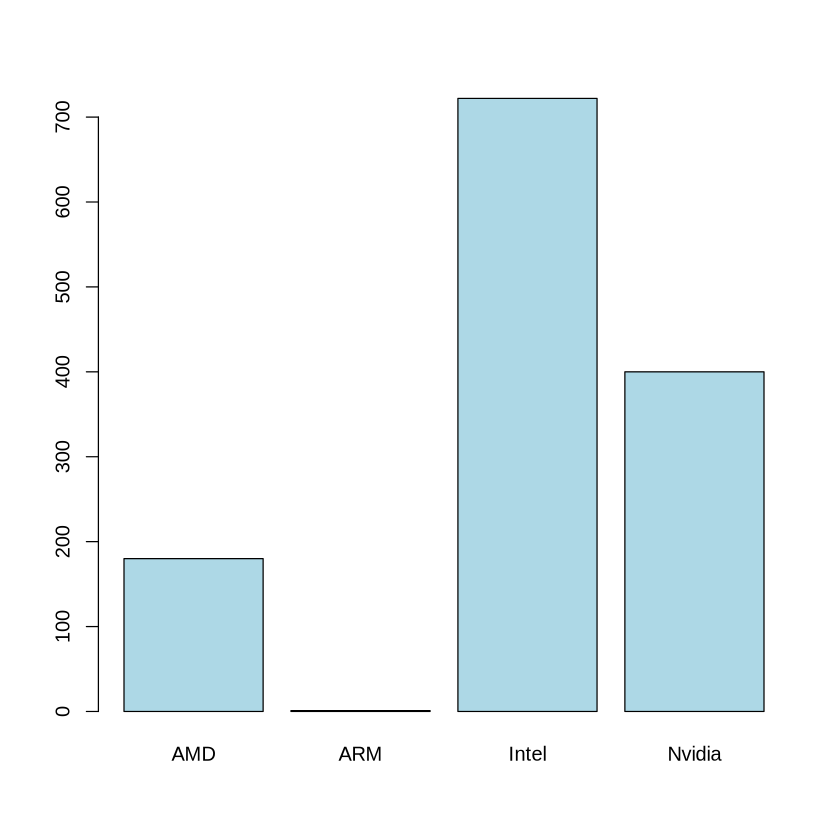

In [26]:
barplot(table(df$Gpu_Brand), col="lightblue")

In [27]:
df <- df %>%
  filter(Gpu_Brand != "ARM")

In [28]:
head(dplyr::count(df, Gpu_Product, sort=TRUE), 10)

,Gpu_Product,n
,<chr>,<int>
1,HD Graphics 620,281
2,HD Graphics 520,185
3,UHD Graphics 620,68
4,GeForce GTX 1050,66
5,GeForce GTX 1060,48
6,GeForce 940MX,43
7,Radeon 530,41
8,HD Graphics 500,39
9,HD Graphics 400,37


In [29]:
df$Gpu_Product <- gsub("\\s+\\w+$", "", df$Gpu_Product)

In [30]:
dplyr::count(df, Gpu_Product, sort=TRUE)

Gpu_Product,n
<chr>,<int>
HD Graphics,609
GeForce GTX,204
GeForce,117
Radeon,80
UHD Graphics,68
Radeon R5,43
Quadro,31
HD,29
GeForce GTX 1050,28


In [31]:
df$Gpu_Product <- sapply(strsplit(df$Gpu_Product, "\\s+"), `[`, 1)

In [32]:
# Replace "GTX" with "GeForce" in Gpu_Product
df$Gpu_Product <- gsub("GTX", "GeForce", df$Gpu_Product)

# Drop rows with NA values in Gpu_Product
df <- df[!is.na(df$Gpu_Product), ]

df <- df[!grepl('Graphics|R4|FirePro', df$Gpu_Product), ]

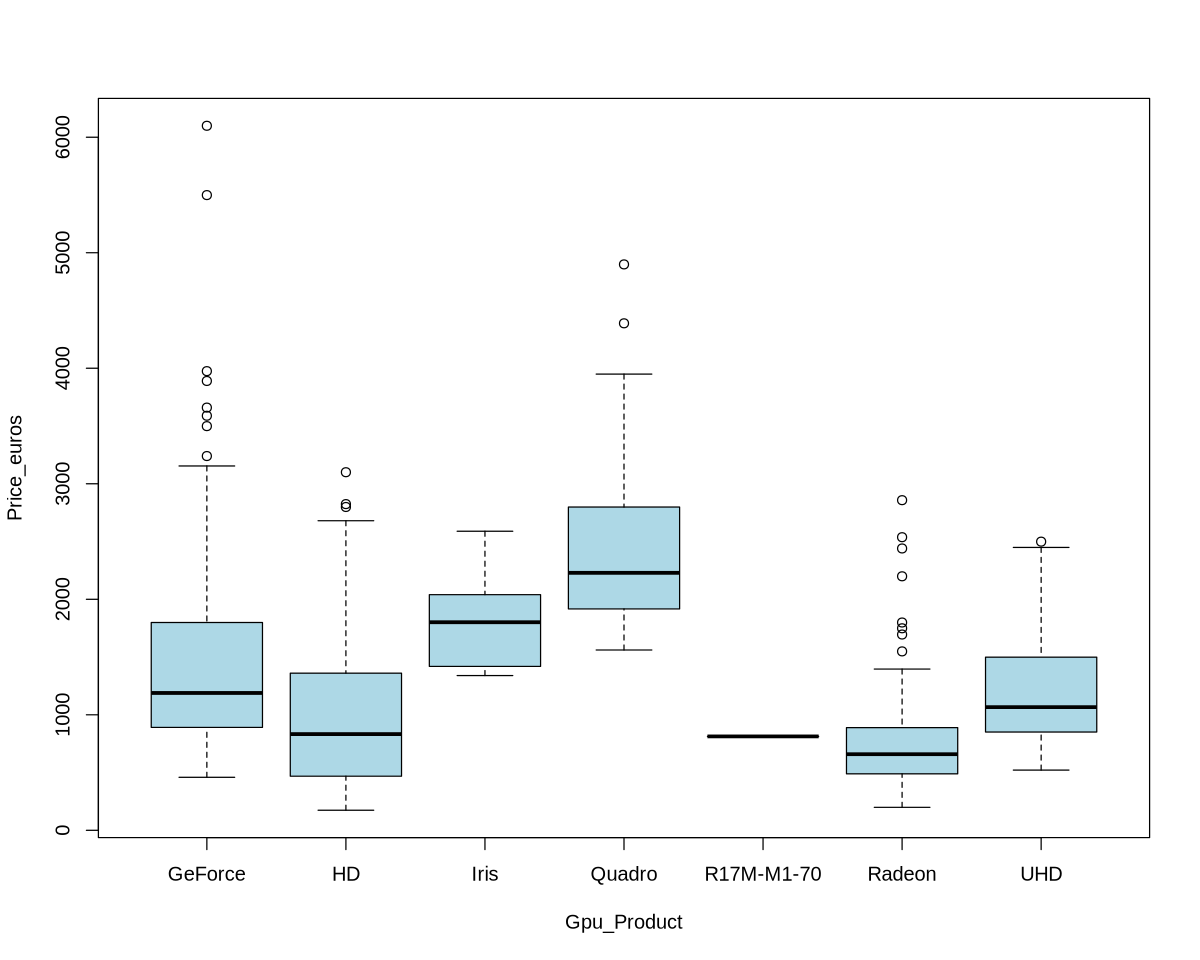

In [33]:
options(repr.plot.width=10, repr.plot.height=8)
boxplot(Price_euros ~ Gpu_Product, data = df, col="lightblue")

#### Feature: OpSys

In [34]:
dplyr::count(df, OpSys, sort=TRUE)

OpSys,n
<chr>,<int>
Windows 10,1067
No OS,66
Linux,62
Windows 7,43
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [35]:
# mapping dict
map_dict <- c("Windows 10 S" = "Windows 10",
              "Mac OS X" = "macOS",
              "Chrome OS" = "Chrome/Android",
              "Android" = "Chrome/Android")

# Recode the OpSys column using the mapping dictionary
df$OpSys <- recode(df$OpSys, !!!map_dict)

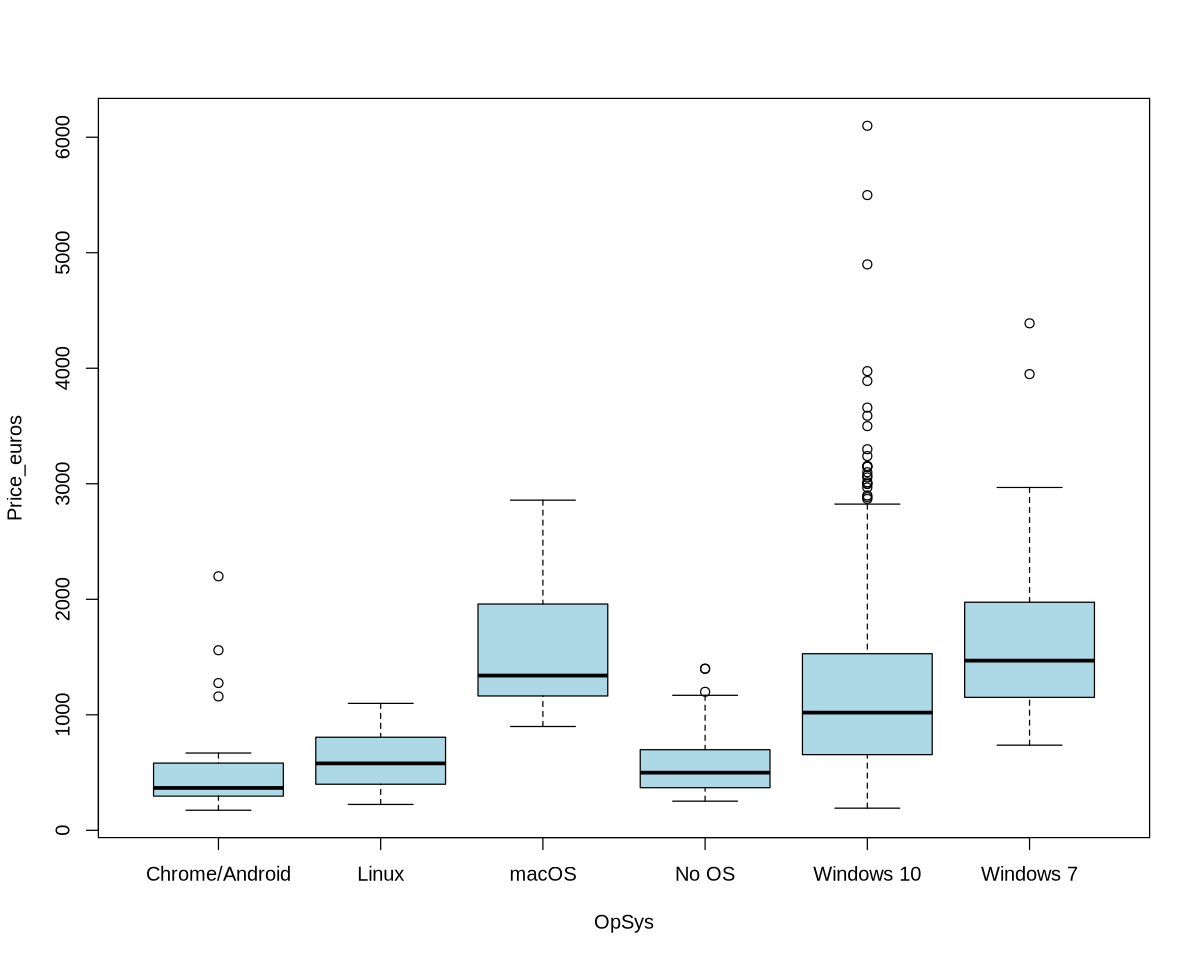

In [36]:
options(repr.plot.width=10, repr.plot.height=8)
boxplot(Price_euros ~ OpSys, data = df, col="lightblue")

#### Weight Feature

In [37]:
length(unique(df$Weight))

[1] 179

In [38]:
df$Weight_kg <- as.numeric(sub("kg$", "", df$Weight))

# Rename the column to Weight_kg
#colnames(df)[colnames(df) == "Weight"] <- "Weight_kg"

In [39]:
length(unique(df$Weight_kg))

[1] 171

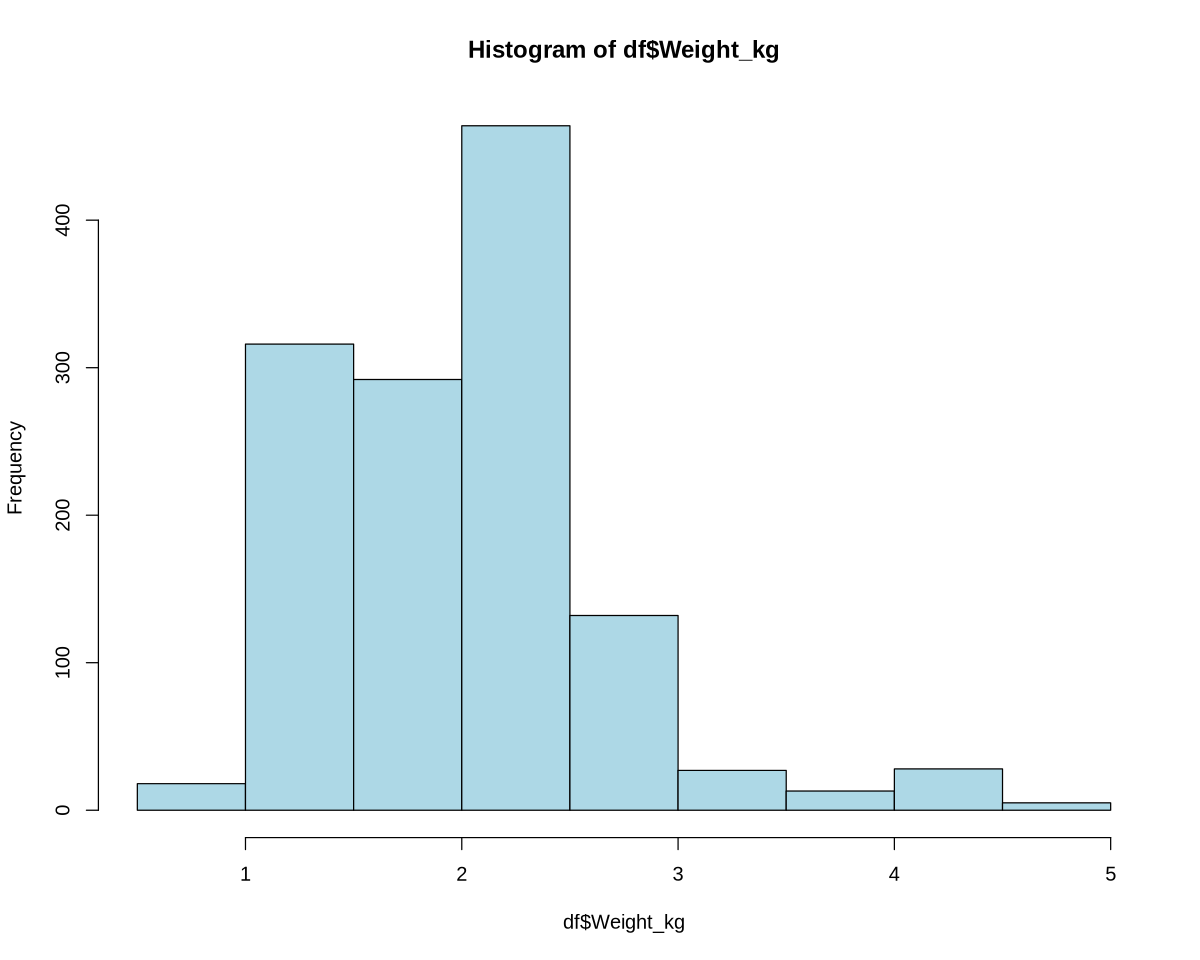

In [40]:
hist(df$Weight_kg, col="lightblue")

#### Saving Prepared data

In [41]:
write.csv(df, file = "../input/laptop_price_prepared.csv", row.names=FALSE)